In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.dm as dm
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils

from apra_pop_models.imshows import *

pupil_diam = 10*u.mm
wavelength_c = 650e-9*u.m




/home/apra/miniconda3/envs/gpu311env/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


/home/apra/Projects/apra-howfsc-models/apra_pop_models


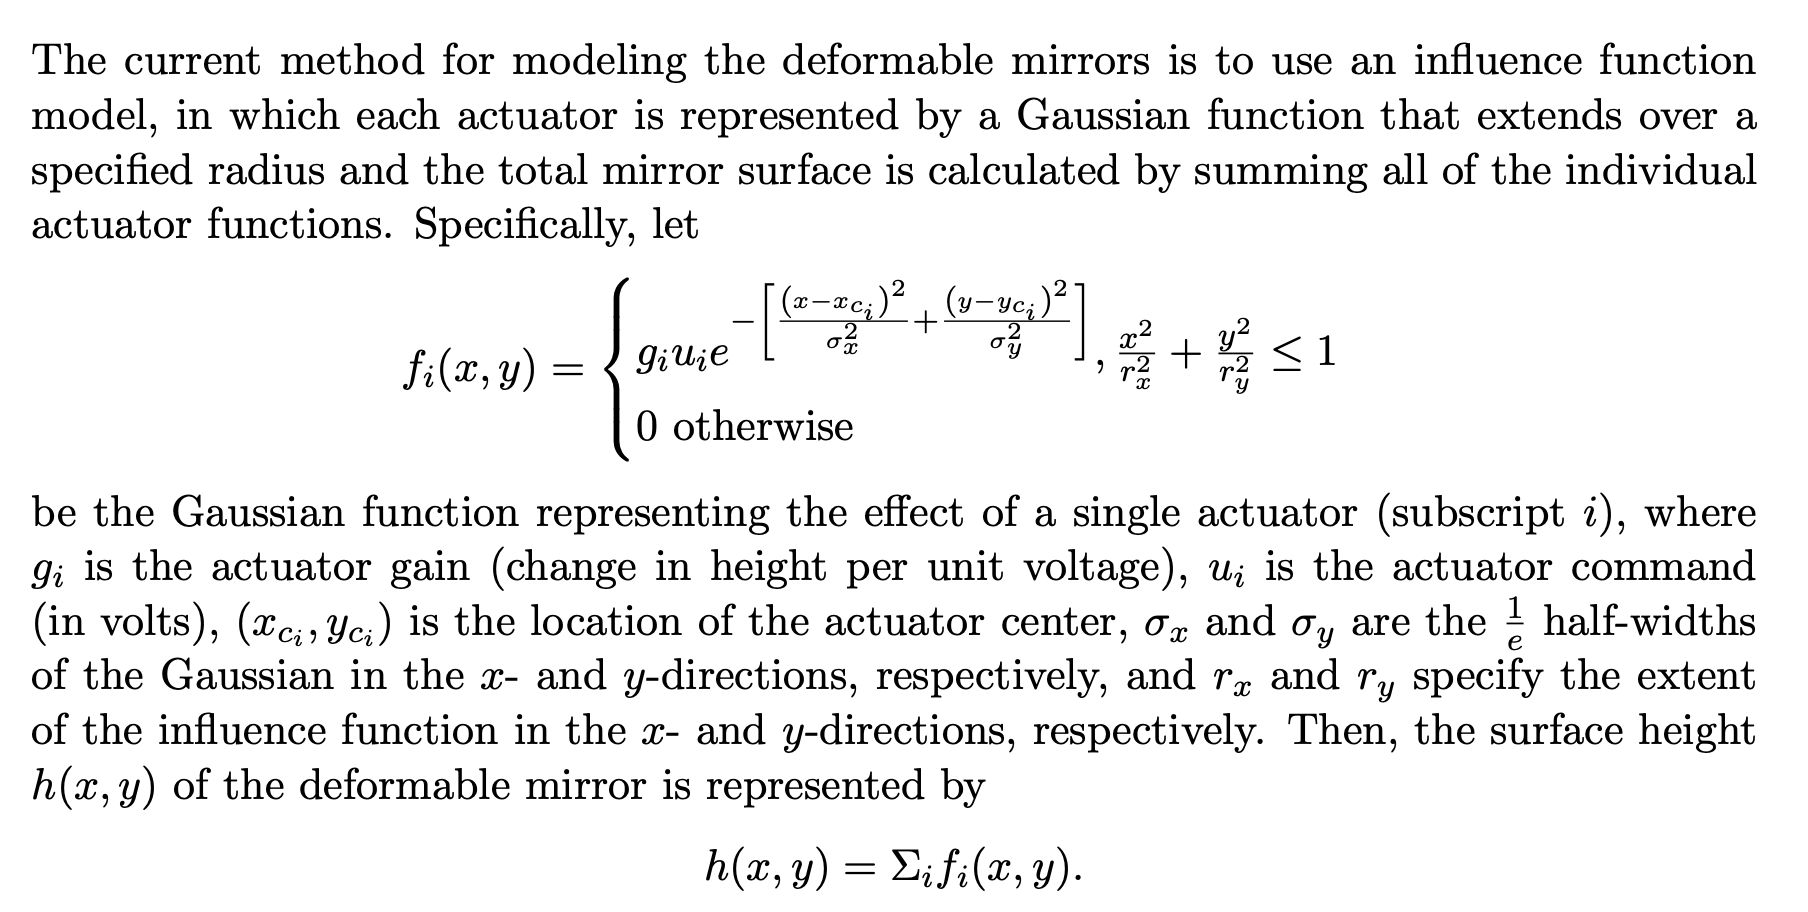

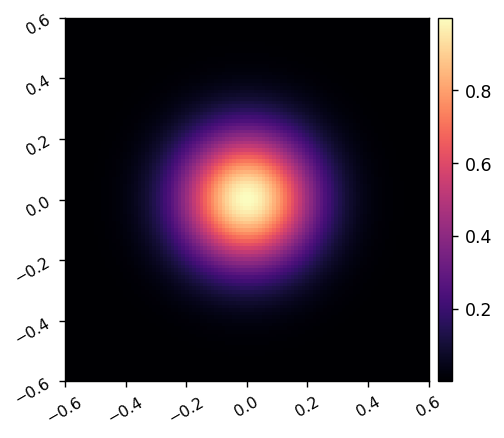

In [30]:
reload(dm)
sampling = 25
act_spacing = 300e-6*u.m
inf_fun, _ = dm.make_gaussian_inf_fun(act_spacing=act_spacing, sampling=sampling, coupling=0.15)
imshow1(inf_fun, pxscl=act_spacing.to(u.mm)/sampling)

Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


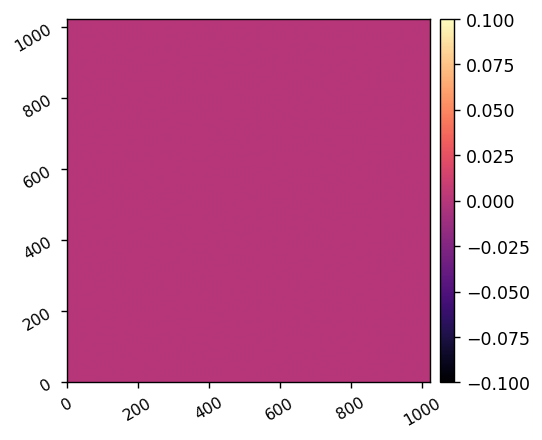

In [31]:
reload(dm)
DM = dm.DeformableMirror(act_spacing=act_spacing, inf_fun=inf_fun, inf_sampling=sampling)
surf = DM.get_surface()
imshow1(surf)

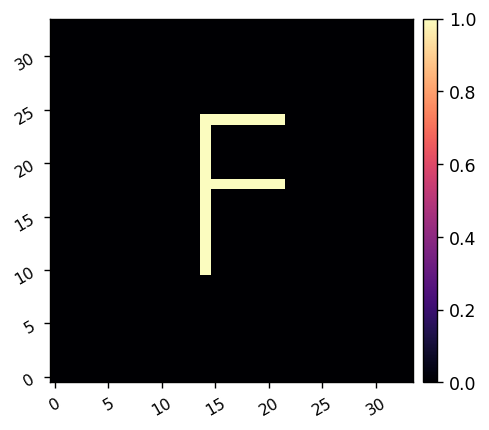

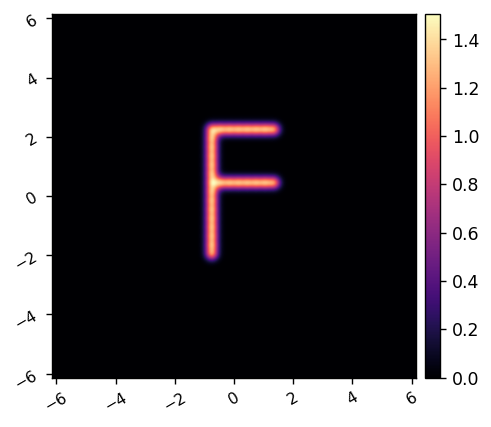

In [32]:
command = xp.zeros((DM.Nact, DM.Nact))
command[10:24,14] = 1
command[24,14:22] = 1
command[18,14:22] = 1
imshow1(command)
DM.command = command
surf = DM.get_surface()
imshow1(surf, pxscl=act_spacing.to(u.mm)/25)

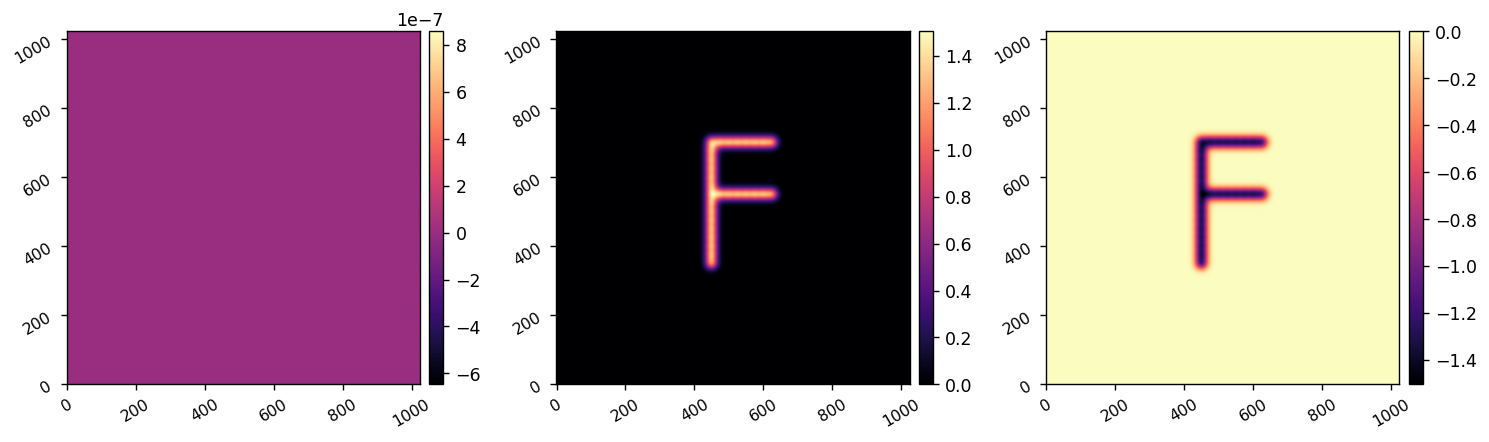

In [33]:
test_result = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_experimental_result.csv', delimiter=',')
diff = test_result - ensure_np_array(surf)
imshow3(test_result, surf, diff)


In [33]:
np.savetxt("test_command.csv", ensure_np_array(command), delimiter=",")
np.savetxt("test_command_result.csv", ensure_np_array(surf), delimiter=",")

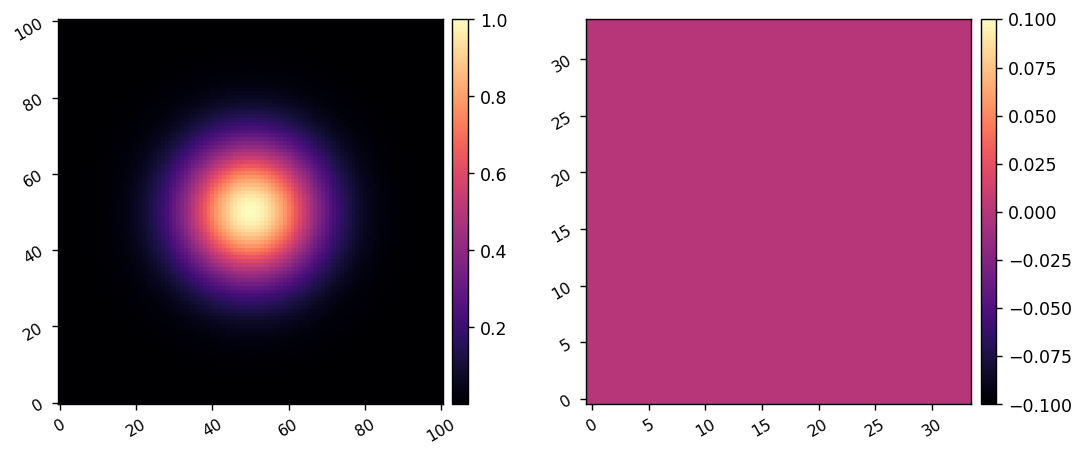

4.04


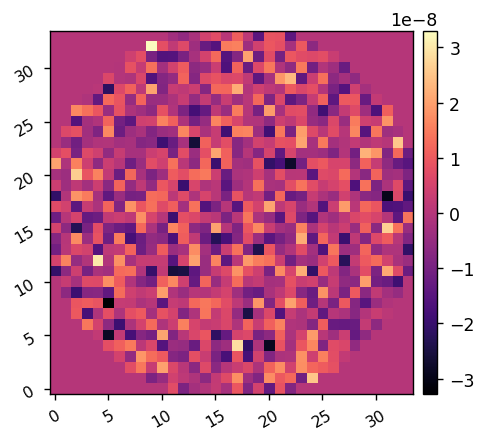

4.0 25
851 951


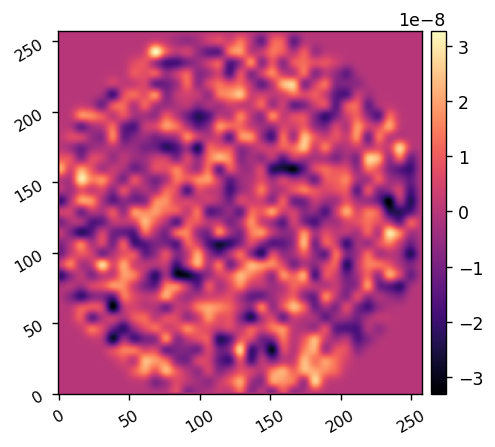

In [102]:
reload(dm)
DM = dm.DeformableMirror()
imshow2(DM.inf_fun, DM.command)

DM.actuators = xp.random.randn(DM.Nacts)*1e-8
imshow1(DM.command)

dmsurf = DM.get_surface(256)
imshow1(dmsurf)

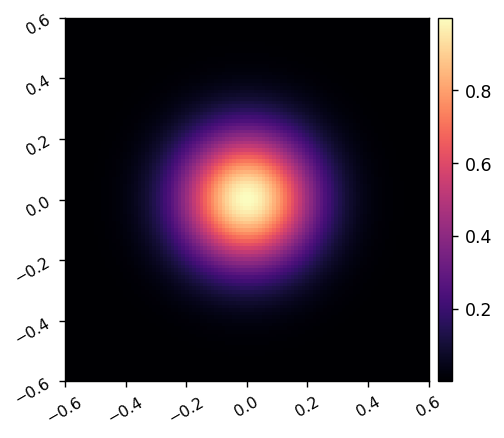

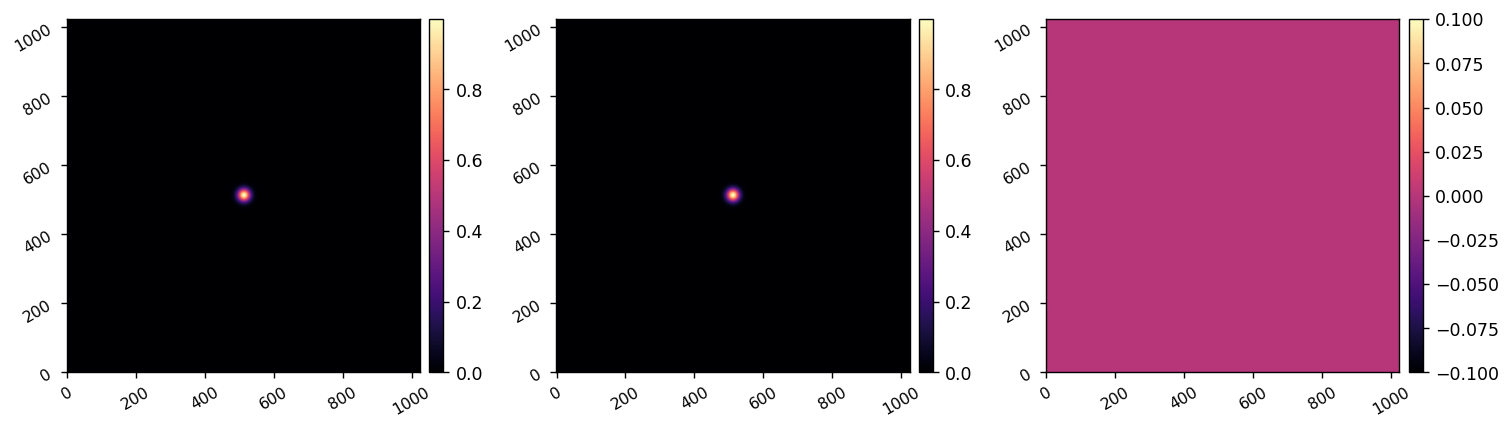

In [29]:
reload(dm)
sampling = 25
act_spacing = 300e-6*u.m
inf_fun, _ = dm.make_gaussian_inf_fun(act_spacing=act_spacing, sampling=sampling, coupling=0.15)
imshow1(inf_fun, pxscl=act_spacing.to(u.mm)/sampling)

test_inf_fun = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_inf_func.csv', delimiter=',')
inf_fun = xp.roll(utils.pad_or_crop(inf_fun, 1024), (0,0), axis=(0,1))
diff = test_inf_fun - ensure_np_array(inf_fun)
imshow3(test_inf_fun, inf_fun, diff)